# Importando librerías para el análisis exploratorio de los datos.

### pandas y seaborn, librerías que ayudarán al análisis exploratorio gráfico y manipulación de datos

In [1]:
import pandas as pd
import seaborn as sns

# Cargando los datos descargados en formato Excel

In [11]:
gtc_covid = pd.read_excel("/Users/PacoRuiz/Downloads/concursos-terminados-adjudicados-al-amparo-de-la-emergecia-covid19.xlsx", header="infer", index_col=0, parse_dates=True)
gtc_todos = pd.read_excel("/Users/PacoRuiz/Downloads/concursos-publicados-2020-adjudicado.xlsx", header="infer",index_col=0,parse_dates=True)

In [12]:
gtc_covid.shape

(4237, 13)

In [13]:
gtc_todos.shape

(60977, 23)

In [14]:
gtc_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 1 to 4237
Data columns (total 13 columns):
NOG_CONCURSO         4237 non-null int64
FECHA_PUBLICACION    4237 non-null datetime64[ns]
FECHA_LIMITE         4237 non-null datetime64[ns]
TIPO_CONCURSO        4237 non-null object
ESTATUS_CONCURSO     4237 non-null object
NOMBRE_ENTIDAD       4237 non-null object
NOMBRE_UNIDAD        4237 non-null object
TITULO_NOG           4237 non-null object
NOMBRE_MODALIDAD     4237 non-null object
MONTO                4237 non-null float64
CANTIDAD             4237 non-null int64
CATEGORIA            4237 non-null object
NUMERO_DOCUMENTO     4237 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 463.4+ KB


In [15]:
gtc_todos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60977 entries, 1 to 60977
Data columns (total 23 columns):
TIPO DE ENTIDAD PADRE             60977 non-null object
TIPO DE ENTIDAD                   60977 non-null object
ENTIDAD COMPRADORA                60977 non-null object
UNIDAD COMPRADORA                 60977 non-null object
NOG CONCURSO                      60977 non-null int64
DESCRIPCIÓN                       60977 non-null object
MODALIDAD                         60977 non-null object
SUB MODALIDAD                     5837 non-null object
NIT                               60262 non-null object
NOMBRE                            60262 non-null object
MONTO                             60977 non-null float64
FECHA DE PUBLICACIÓN              60977 non-null datetime64[ns]
MES DE PUBLICACIÓN                60977 non-null object
AÑO DE PUBLICACIÓN                60977 non-null int64
FECHA DE ULTIMA ADJUDICACIÓN      60977 non-null datetime64[ns]
FECHA DE ADJUDICACIÓN             609

## El archivo #gtc_todos contiene los datos de adjudicación de concursos, mientras que el #gtc_covid, tiene información básica.  Suponiendo que todos contiene a covid, hacemos un subset de todos con los datos de covid, haciendo un match por NOG (Número de operación de Guatecompras) 

In [8]:
resultado = gtc_todos[gtc_todos["NOG CONCURSO"].isin(gtc_covid["NOG_CONCURSO"])]

In [9]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4819 entries, 27768 to 60930
Data columns (total 24 columns):
NO                                4819 non-null int64
TIPO DE ENTIDAD PADRE             4819 non-null object
TIPO DE ENTIDAD                   4819 non-null object
ENTIDAD COMPRADORA                4819 non-null object
UNIDAD COMPRADORA                 4819 non-null object
NOG CONCURSO                      4819 non-null int64
DESCRIPCIÓN                       4819 non-null object
MODALIDAD                         4819 non-null object
SUB MODALIDAD                     4486 non-null object
NIT                               4819 non-null object
NOMBRE                            4819 non-null object
MONTO                             4819 non-null float64
FECHA DE PUBLICACIÓN              4819 non-null datetime64[ns]
MES DE PUBLICACIÓN                4819 non-null object
AÑO DE PUBLICACIÓN                4819 non-null int64
FECHA DE ULTIMA ADJUDICACIÓN      4819 non-null datetime6

In [10]:
#resultado.to_excel("salidaFinal.xlsx")
resultado.nunique()

NO                                4819
TIPO DE ENTIDAD PADRE                2
TIPO DE ENTIDAD                      5
ENTIDAD COMPRADORA                 164
UNIDAD COMPRADORA                  274
NOG CONCURSO                      4224
DESCRIPCIÓN                       4138
MODALIDAD                            4
SUB MODALIDAD                        1
NIT                                736
NOMBRE                             736
MONTO                             2664
FECHA DE PUBLICACIÓN                90
MES DE PUBLICACIÓN                   4
AÑO DE PUBLICACIÓN                   1
FECHA DE ULTIMA ADJUDICACIÓN        86
FECHA DE ADJUDICACIÓN               86
MES DE ADJUDICACIÓN                  4
AÑO DE ADJUDICACIÓN                  1
CATEGORÍAS                          90
ESTATUS DEL CONCURSO                 1
FECHA CIERRE RECEPCIÓN OFERTAS    1373
MES DE CIERRE RECEPCIÓN              4
AÑO DE CIERRE RECEPCIÓN              1
dtype: int64

### Del listado anterior, donde totalizamos los valores únicos por cada columna, vemos varias cosas:

1. Hay varios campos con valores únicos, candidatos eliminarse para el análisis futuro
2. Hay algunas tipificaciones por Tipo de Entidad por analizar
3. Hay 164 entidades compradoras y 274 unidades compradoras, ambas a niveles distintos.
4. Hay más filas que concursos, ya que un concurso puede adjudicarse a más de un proveedor
5. Hay 4 modalidades de compra, todas relacionadas con la emergencia del COVID19
6. Hay 90 distintas categorías, que luego analizaremos
7. Al haber fecha de recepción de ofertas, puede analizarse el tiempo en el que cada concurso estuvo abierto, y poder detectar anomalías.

Todo lo anterior implica hacer ajustes en los tipos de datos para tratarlos mejor, situación que se hará en la siguientes líneas de código.

In [39]:
resultado["MODALIDAD"].value_counts()

Procedimientos Regulados por el artículo 44 LCE (Casos de Excepción)    4486
Compra Directa con Oferta Electrónica (Art. 43 LCE Inciso b)             258
Compra Directa con Oferta Electrónica Ley de Emergencia COVID19           72
Cotización (Art. 38 LCE)                                                   3
Name: MODALIDAD, dtype: int64

In [46]:
resultado[["MODALIDAD", "SUB MODALIDAD"]].nunique()

MODALIDAD        4
SUB MODALIDAD    1
dtype: int64

In [50]:
resultado["TIPO DE ENTIDAD PADRE"].value_counts()

Sector Público                    4813
Fideicomisos y otras entidades       6
Name: TIPO DE ENTIDAD PADRE, dtype: int64

In [51]:
resultado["TIPO DE ENTIDAD"].value_counts()

Administración Central                                         3042
Entidades Descentralizadas, Autónomas y de Seguridad Social    1490
Gobiernos Locales (Municipalidades, Mancomunidades, etc.)       270
Empresas Públicas (Nacionales y Municipales)                     11
ONG's, patronatos, comités, asociaciones y fundaciones            6
Name: TIPO DE ENTIDAD, dtype: int64

In [38]:
resultado[resultado["NOG CONCURSO"] == 12298638]

,NO,TIPO DE ENTIDAD PADRE,TIPO DE ENTIDAD,ENTIDAD COMPRADORA,UNIDAD COMPRADORA,NOG CONCURSO,DESCRIPCIÓN,MODALIDAD,SUB MODALIDAD,NIT,...,AÑO DE PUBLICACIÓN,FECHA DE ULTIMA ADJUDICACIÓN,FECHA DE ADJUDICACIÓN,MES DE ADJUDICACIÓN,AÑO DE ADJUDICACIÓN,CATEGORÍAS,ESTATUS DEL CONCURSO,FECHA CIERRE RECEPCIÓN OFERTAS,MES DE CIERRE RECEPCIÓN,AÑO DE CIERRE RECEPCIÓN
35328,35329,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,8163294,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35329,35330,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,22339655,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35330,35331,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,39796558,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35331,35332,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,41296184,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35332,35333,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,104277823,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35333,35334,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,7477279,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35334,35335,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,6623069,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35335,35336,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,5490421,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:30:00,Marzo,2020
35336,35337,Sector Público,Administración Central,MINISTERIO DE SALUD PÚBLICA,HOSPITAL NACIONAL DE SAN PEDRO NECTA,12298638,ADQUISICIÓN DE PRODUCTOS MEDICINALES Y FARMACÉ...,Procedimientos Regulados por el artículo 44 LC...,Ley Constitucional de Orden Público (Art. 44 i...,4123670,...,2020,2020-04-14,2020-04-14,Abril,2020,Salud e insumos hospitalarios,Terminado adjudicado,2020-03-30 10:3

In [12]:
print(gttodos.describe())

                 NO  NOG CONCURSO         MONTO  AÑO DE PUBLICACIÓN  \
count  60977.000000  6.097700e+04  6.097700e+04             60977.0   
mean   30489.000000  1.222895e+07  1.057128e+05              2020.0   
std    17602.688019  3.032667e+05  2.283169e+06                 0.0   
min        1.000000  7.501951e+06  1.000000e-02              2020.0   
25%    15245.000000  1.198160e+07  6.000000e+03              2020.0   
50%    30489.000000  1.221140e+07  3.808000e+04              2020.0   
75%    45733.000000  1.248814e+07  8.192000e+04              2020.0   
max    60977.000000  1.281930e+07  4.454703e+08              2020.0   

       AÑO DE ADJUDICACIÓN  AÑO DE CIERRE RECEPCIÓN  
count              60977.0                  60977.0  
mean                2020.0                   2020.0  
std                    0.0                      0.0  
min                 2020.0                   2020.0  
25%                 2020.0                   2020.0  
50%                 2020.0          

In [13]:
gtcovid.describe()

,FILA,NOG_CONCURSO,MONTO,CANTIDAD
count,4237.000000,4.237000e+03,4.237000e+03,4237.000000
mean,2119.000000,1.250777e+07,1.313175e+05,1.142082
std,1223.260874,1.464160e+05,8.815596e+05,0.632841
min,1.000000,1.216780e+07,4.000000e+01,1.000000
25%,1060.000000,1.237425e+07,1.430000e+04,1.000000
50%,2119.000000,1.251048e+07,4.774000e+04,1.000000
75%,3178.000000,1.262826e+07,8.436700e+04,1.000000
max,4237.000000,1.281063e+07,2.913000e+07,11.000000


In [14]:
solocovid = pd.merge(gttodos, gtcovid, left_on = "NOG CONCURSO", right_on = "NOG_CONCURSO", how="right")

In [15]:
solocovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 0 to 4831
Data columns (total 38 columns):
NO                                4819 non-null float64
TIPO DE ENTIDAD PADRE             4819 non-null object
TIPO DE ENTIDAD                   4819 non-null object
ENTIDAD COMPRADORA                4819 non-null object
UNIDAD COMPRADORA                 4819 non-null object
NOG CONCURSO                      4819 non-null float64
DESCRIPCIÓN                       4819 non-null object
MODALIDAD                         4819 non-null object
SUB MODALIDAD                     4486 non-null object
NIT                               4819 non-null object
NOMBRE                            4819 non-null object
MONTO_x                           4819 non-null float64
FECHA DE PUBLICACIÓN              4819 non-null datetime64[ns]
MES DE PUBLICACIÓN                4819 non-null object
AÑO DE PUBLICACIÓN                4819 non-null float64
FECHA DE ULTIMA ADJUDICACIÓN      4819 non-null datetime

In [16]:
gtcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 14 columns):
FILA                 4237 non-null int64
NOG_CONCURSO         4237 non-null int64
FECHA_PUBLICACION    4237 non-null datetime64[ns]
FECHA_LIMITE         4237 non-null datetime64[ns]
TIPO_CONCURSO        4237 non-null object
ESTATUS_CONCURSO     4237 non-null object
NOMBRE_ENTIDAD       4237 non-null object
NOMBRE_UNIDAD        4237 non-null object
TITULO_NOG           4237 non-null object
NOMBRE_MODALIDAD     4237 non-null object
MONTO                4237 non-null float64
CANTIDAD             4237 non-null int64
CATEGORIA            4237 non-null object
NUMERO_DOCUMENTO     4237 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 463.5+ KB


In [23]:
len(pd.unique(gtcovid["NOG_CONCURSO"]))

4237

In [ ]:
len(pd.unique(gtcovid["NOG_CONCURSO"]))

In [24]:
import seaborn as sns

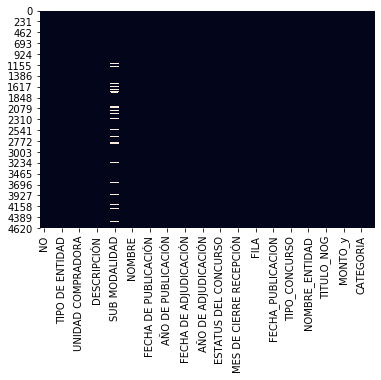

In [25]:
sns.heatmap(solocovid.isnull(), cbar=False)

In [ ]:
resultado = gttodos[]